In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
from sympy.geometry import Point, Line
from sympy.vector import CoordSys3D, vector

from sympy.geometry import Point, Line, Triangle
from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()
df_ejercicios = pd.DataFrame()

fichero = 'autoev22'
titulo = 'Autoevaluación 2 ev2'
curso = '1BC'


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def a_polar(binomico) :
    return [abs(binomico), arg(binomico)]

def a_binomico(polar) :
    return(polar[0]*cos(polar[1])+polar[0]*sin(polar[1])*I)

In [3]:
def simbolo (operacion):
    if operacion == '<=' :
        return('\leq')
    elif operacion == '>=' :
        return('\geq')
    else :
        return(operacion)

In [4]:
def Linea(expr) :
    eq = eval(str(parse_latex(expr)))
    p1 = Point(0,nsimplify(solve(Eq(eq.args[0].subs(x,0),eq.args[1].subs(x,0)),y)[0]))
    p2 = Point(1,nsimplify(solve(Eq(eq.args[0].subs(x,1),eq.args[1].subs(x,1)),y)[0]))
    
    return Line(p1,p2)
    #return [p1,p2]

In [5]:
def sol_sist(sist):
    # Función que recibe un sistema de ecuaciones en Latex y devuelve: 
    # El sistema en latex, la lista de exuaciones sympy, la solución y la matriz de ecuacuibes
    
    sist_latex = r"""\left\{\begin{matrix}"""
    eq = []
    sb = EmptySet() # variables de las ecuaciones
    
    for i,e in enumerate(sist):
        sist_latex = sist_latex + e + r'\\ '
        eq.append(Eq(parse_latex(e[:e.find('=')]),parse_latex(e[e.find('=')+1:])).simplify())
        sb = parse_latex(e[:e.find('=')]).free_symbols.union(sb)
        sb = parse_latex(e[e.find('=')+1:]).free_symbols.union(sb)
        
       

    sist_latex = sist_latex + r'\end{matrix}\right.'
    
    matriz = linear_eq_to_matrix(eq,list(sb))
    matriz = matriz[0].row_join(matriz[1])
    
    return [sist_latex, eq, solve(eq), matriz]    

In [6]:
# Página 35 ejercicio 1

texto_ejercicio = r"""Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 3\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 2\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i - \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 4\overrightarrow j$
	Calcular:"""

n_ejercicio = 'pa21e02'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

# vectores iniciales correspondientes al texto del enunciado

vectores = [-3*i+j, 2*i-2*j, i-j, -i-4*j]

u,v,w,z = vectores

enunciado_latex = ["""Las coordenadas de cada uno de ellos respecto de la base canónica.
	Las coordenadas de los vectores:$\overrightarrow u + 2\overrightarrow v$, 
    $5\overrightarrow u - \overrightarrow w$, 
    $ - 3\overrightarrow v + 4\overrightarrow w$, 
    $\overrightarrow w - 2\overrightarrow z$""", ]

enunciado = [[u+2*v, 5*u-w, -3*v+4*w, w-2*z]]

display(enunciado)

solucion = []

for i, s in enumerate(enunciado) : 
    so1 = [tuple(l.components.values()) for l in  vectores]
    so2 = [tuple(l.components.values()) for l in s]
    solucion.append([so1,so2])
    display([so1,so2])

#df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False), ignore_index=True)


**Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 3\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 2\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i - \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 4\overrightarrow j$
	Calcular:**

In [7]:
# Página 35 ejercicio 2

texto_ejercicio = r"""Estudia la dependencia lineal de los siguientes conjuntos de vectores:"""

n_ejercicio = 'pa21e03'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[(8,12),(2,3)],
                       [(2,6),(4,7)],

                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en="Point"+str(s[0])+".is_collinear(Point"+str(s[1])+", Point(0,0))"
    enunciado.append(en)
    solucion.append(S(en))
    display(solucion[i])

#df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Estudia la dependencia lineal de los siguientes conjuntos de vectores:**

$\overrightarrow{u}=(8, 12) \, \ \overrightarrow{v}=(2, 3)$

True

$\overrightarrow{u}=(2, 6) \, \ \overrightarrow{v}=(4, 7)$

False

In [8]:
# Página 36 ejercicio 9

texto_ejercicio = r"""Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:"""


n_ejercicio = 'pa21e04'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(2,-6),(5,6)],
                       [(2,5),(4,6)],]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en=["Point"+str(s[0])+".dot(Point"+str(s[1])+")"]
    en.append(["Point"+str(s[0])+".distance(Point(0,0))","Point"+str(s[1])+".distance(Point(0,0))"])
    angulo = float(deg(acos(float(S(str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+")")))))
    #en.append("acos("+str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+"))")
    en.append(angulo)
    enunciado.append(en)
    solucion.append(latex(S(en)))
    
    display(md("$"+solucion[i]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:**

$\overrightarrow{u}=(2, -6) \, \ \overrightarrow{v}=(5, 6)$

$\left [ -26, \quad \left [ 2 \sqrt{10}, \quad \sqrt{61}\right ], \quad 121.759480084813\right ]$

$\overrightarrow{u}=(2, 5) \, \ \overrightarrow{v}=(4, 6)$

$\left [ 38, \quad \left [ \sqrt{29}, \quad 2 \sqrt{13}\right ], \quad 11.888658039628\right ]$

**Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: **

$\overrightarrow{u}=(6, x) \, \ \overrightarrow{v}=(10, 2)$

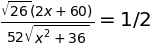

$\left [ \frac{60}{11} + \frac{78 \sqrt{3}}{11}, \quad - \frac{78 \sqrt{3}}{11} + \frac{60}{11}\right ]$

In [9]:
# Página 36 ejercicio 15

texto_ejercicio = r"""Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: """


n_ejercicio = 'pa21e05'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(6,x),(10,2)],

                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    v = s[1][0]*i+s[1][1]*j
    en=Eq(u.dot(v)/(u.magnitude()*v.magnitude()),cos(rad(60)))
    display(en)
    enunciado.append(en)
    solucion.append(latex(solve(en)))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


In [10]:
# Página 41 ejercicio 27

texto_ejercicio = 'Resolver las siguientes ecuaciones para ángulos en el primer cuadrante:'
n_ejercicio = 'pa21e06'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\sin{2x}=\frac{\sqrt {2}}{2}',
                   r'\tan{\frac{x}{2}}=\sqrt{3}',
                   r'\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2}',
                   
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    #solucion.append(latex(solve(parse_latex(s)))) 
    solucion.append(latex([nsimplify(i/pi)*pi for i in solve(eval(str(parse_latex(s))))])) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1'), ignore_index=True)


**Resolver las siguientes ecuaciones para ángulos en el primer cuadrante:**

$\sin{2x}=\frac{\sqrt {2}}{2} \rightarrow \left [ \frac{\pi}{8}, \quad \frac{3 \pi}{8}\right ]$

$\tan{\frac{x}{2}}=\sqrt{3} \rightarrow \left [ \frac{2 \pi}{3}\right ]$

$\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2} \rightarrow \left [ \frac{\pi}{12}, \quad \frac{7 \pi}{12}\right ]$

In [11]:
texto_ejercicio = 'Resolver las siguientes ecuaciones:'
n_ejercicio = 'pa21e07'

enunciado_latex = [r'\tan{2x}=\cot{x}',
                  r'\sin{x}\cos{x}=-\frac{1}{2}',
                  r'\sqrt{3}\sin{x}+\cos{x}=-2',            
                 ]
                                       

display(md("**"+texto_ejercicio+"**"))

                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    #solucion.append(latex(solve(parse_latex(s)))) 
    solucion.append(latex([round(float(deg(nsimplify(i/pi)*pi)),3) for i in solve(eval(str(parse_latex(s))))])) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1'), ignore_index=True)


**Resolver las siguientes ecuaciones:**

$\tan{2x}=\cot{x} \rightarrow \left [ -90.0, \quad 90.0, \quad -150.0, \quad 150.0, \quad -30.0, \quad 30.0\right ]$

$\sin{x}\cos{x}=-\frac{1}{2} \rightarrow \left [ -45.0, \quad 135.0\right ]$

$\sqrt{3}\sin{x}+\cos{x}=-2 \rightarrow \left [ -120.0\right ]$

In [12]:
# Página 45 ejercicio 12



texto_ejercicio = 'Dado el siguiente número $z$, calcula el valor de $\\frac{z-\overline{z}}{z+\overline{z}}$'
n_ejercicio = 'pa22e08'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\sqrt{6}-2\sqrt{4}i', 
                   r'\sqrt{4}-2\sqrt{6}i', 
                   
                   
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    solucion.append(latex((simplify(eval(str(parse_latex(s).replace('i','I'))))-conjugate(simplify(eval(str(parse_latex(s).replace('i','I'))))))/((simplify(eval(str(parse_latex(s).replace('i','I')))))+conjugate(simplify(eval(str(parse_latex(s).replace('i','I')))))))) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Dado el siguiente número $z$, calcula el valor de $\frac{z-\overline{z}}{z+\overline{z}}$**

$\sqrt{6}-2\sqrt{4}i \rightarrow - \frac{2 \sqrt{6} i}{3}$

$\sqrt{4}-2\sqrt{6}i \rightarrow - \sqrt{6} i$

In [13]:
# Página 45 ejercicio 12



texto_ejercicio = 'Dado el siguiente número $z$, calcula el valor de $\\frac{z-\overline{z}}{z+\overline{z}}$'
n_ejercicio = 'pa22e08'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\sqrt{6}-2\sqrt{4}i', 
                   r'\sqrt{4}-2\sqrt{6}i', 
                   
                   
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    solucion.append(latex((simplify(eval(str(parse_latex(s).replace('i','I'))))-conjugate(simplify(eval(str(parse_latex(s).replace('i','I'))))))/((simplify(eval(str(parse_latex(s).replace('i','I')))))+conjugate(simplify(eval(str(parse_latex(s).replace('i','I')))))))) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Dado el siguiente número $z$, calcula el valor de $\frac{z-\overline{z}}{z+\overline{z}}$**

$\sqrt{6}-2\sqrt{4}i \rightarrow - \frac{2 \sqrt{6} i}{3}$

$\sqrt{4}-2\sqrt{6}i \rightarrow - \sqrt{6} i$

In [14]:
# Página 51 ejercicio 21

texto_ejercicio = 'Calcular el módulo y el argumento (en radianes) de los siguientes números complejos:'

n_ejercicio = 'pa22e08b'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'4 - 2\sqrt {3}i',
                   r'-1-i',
                   r' -6-6i',
                   r'-5i',
                   r'3',
               
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    mod, argu = a_polar(eval(str(parse_latex(s).replace('i','I'))))
    solucion.append(latex(mod)+"_{"+latex(argu)+"}") 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Calcular el módulo y el argumento (en radianes) de los siguientes números complejos:**

$4 - 2\sqrt {3}i \rightarrow 2 \sqrt{7}_{- \operatorname{atan}{\left (\frac{\sqrt{3}}{2} \right )}}$

$-1-i \rightarrow \sqrt{2}_{- \frac{3 \pi}{4}}$

$ -6-6i \rightarrow 6 \sqrt{2}_{- \frac{3 \pi}{4}}$

$-5i \rightarrow 5_{- \frac{\pi}{2}}$

$3 \rightarrow 3_{0}$

In [15]:
# Página 51 ejercicio 21

texto_ejercicio = 'Escribe en forma binómica los siguientes números complejos:'

n_ejercicio = 'pa22e08c'

display(md("**"+texto_ejercicio+"**"))

enunciado = [[3,pi/4],
             [2,pi/6],
             [2*sqrt(2),pi],
             [7,0],
             [1,pi/2],
                   
                  ]
                                       




enunciado_latex, solucion = [], []

for i, s in enumerate(enunciado) :
    enunciado_latex.append(latex(s[0])+"_{"+latex(s[1])+"}")
    solucion.append(latex(a_binomico(s))) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Escribe en forma binómica los siguientes números complejos:**

$3_{\frac{\pi}{4}} \rightarrow \frac{3 \sqrt{2}}{2} + \frac{3 \sqrt{2} i}{2}$

$2_{\frac{\pi}{6}} \rightarrow \sqrt{3} + i$

$2 \sqrt{2}_{\pi} \rightarrow - 2 \sqrt{2}$

$7_{0} \rightarrow 7$

$1_{\frac{\pi}{2}} \rightarrow i$

In [16]:
texto_ejercicio = r"""Calcula el área del triángulo de vértices:"""

n_ejercicio = 'pa22e09'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(-1, 1), (1, 6), (3,-3)], 

                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s]
    T=Triangle(A,B,C)
    sol=[A.distance(B),T.altitudes[C],T.altitudes[C].length, abs(T.area)]
    solucion.append(latex(sol[3]))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Calcula el área del triángulo de vértices:**

$A=(-1, 1), \ B=(1, 6),\  y \ C=(3, -3) \rightarrow 14$

In [17]:
df_ejercicios.to_csv('ejercicios_auto22.csv', index = False)
df_ejercicios = pd.read_csv('ejercicios_auto22.csv', index_col= None)
escribir_preambulo(fichero, titulo)
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **pa21e04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,"\overrightarrow{u}=(2, -6) \, \ \overrightarro...","['Point(2, -6).dot(Point(5, 6))', ['Point(2, -...","\left [ -26, \quad \left [ 2 \sqrt{10}, \quad ...",Respecto de una base ortonormal tenemos dos ve...,1BC,Autoevaluación 2 ev2,pa21e04,1,2,1,True,True
1,"\overrightarrow{u}=(2, 5) \, \ \overrightarrow...","['Point(2, 5).dot(Point(4, 6))', ['Point(2, 5)...","\left [ 38, \quad \left [ \sqrt{29}, \quad 2 \...",Respecto de una base ortonormal tenemos dos ve...,1BC,Autoevaluación 2 ev2,pa21e04,1,2,1,True,True


**Ejercicio: **pa21e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
2,"\overrightarrow{u}=(6, x) \, \ \overrightarrow...","Eq(sqrt(26)*(2*x + 60)/(52*sqrt(x**2 + 36)), 1/2)",\left [ \frac{60}{11} + \frac{78 \sqrt{3}}{11}...,Calcula x para que los vectores\n$\overrightar...,1BC,Autoevaluación 2 ev2,pa21e05,1,2,1,True,True


**Ejercicio: **pa21e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
3,\sin{2x}=\frac{\sqrt {2}}{2},"Eq(sin(2*x), sqrt(2)/2)","\left [ \frac{\pi}{8}, \quad \frac{3 \pi}{8}\r...",Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 2 ev2,pa21e06,1,1,1,True,True
4,\tan{\frac{x}{2}}=\sqrt{3},"Eq(tan(x/2), sqrt(3))",\left [ \frac{2 \pi}{3}\right ],Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 2 ev2,pa21e06,1,1,1,True,True
5,\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2},"Eq(sin(-pi/2 + 3*x), -sqrt(2)/2)","\left [ \frac{\pi}{12}, \quad \frac{7 \pi}{12}...",Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 2 ev2,pa21e06,1,1,1,True,True


**Ejercicio: **pa21e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
6,\tan{2x}=\cot{x},"Eq(tan(2*x), cot(x))","\left [ -90.0, \quad 90.0, \quad -150.0, \quad...",Resolver las siguientes ecuaciones:,1BC,Autoevaluación 2 ev2,pa21e07,1,1,1,True,True
7,\sin{x}\cos{x}=-\frac{1}{2},"Eq(sin(x)*cos(x), -1/2)","\left [ -45.0, \quad 135.0\right ]",Resolver las siguientes ecuaciones:,1BC,Autoevaluación 2 ev2,pa21e07,1,1,1,True,True
8,\sqrt{3}\sin{x}+\cos{x}=-2,"Eq(sqrt(3)*sin(x) + cos(x), -2)",\left [ -120.0\right ],Resolver las siguientes ecuaciones:,1BC,Autoevaluación 2 ev2,pa21e07,1,1,1,True,True


**Ejercicio: **pa22e08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
9,\sqrt{6}-2\sqrt{4}i,-4*i + sqrt(6),- \frac{2 \sqrt{6} i}{3},"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 2 ev2,pa22e08,1,2,1,True,True
10,\sqrt{4}-2\sqrt{6}i,-2*sqrt(6)*i + 2,- \sqrt{6} i,"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 2 ev2,pa22e08,1,2,1,True,True
11,\sqrt{6}-2\sqrt{4}i,-4*i + sqrt(6),- \frac{2 \sqrt{6} i}{3},"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 2 ev2,pa22e08,1,2,1,True,True
12,\sqrt{4}-2\sqrt{6}i,-2*sqrt(6)*i + 2,- \sqrt{6} i,"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 2 ev2,pa22e08,1,2,1,True,True


**Ejercicio: **pa22e08b

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,4 - 2\sqrt {3}i,-2*sqrt(3)*i + 4,2 \sqrt{7}_{- \operatorname{atan}{\left (\frac...,Calcular el módulo y el argumento (en radianes...,1BC,Autoevaluación 2 ev2,pa22e08b,1,2,1,True,True
14,-1-i,-i - 1,\sqrt{2}_{- \frac{3 \pi}{4}},Calcular el módulo y el argumento (en radianes...,1BC,Autoevaluación 2 ev2,pa22e08b,1,2,1,True,True
15,-6-6i,-6*i - 6,6 \sqrt{2}_{- \frac{3 \pi}{4}},Calcular el módulo y el argumento (en radianes...,1BC,Autoevaluación 2 ev2,pa22e08b,1,2,1,True,True
16,-5i,-5*i,5_{- \frac{\pi}{2}},Calcular el módulo y el argumento (en radianes...,1BC,Autoevaluación 2 ev2,pa22e08b,1,2,1,True,True
17,3,3,3_{0},Calcular el módulo y el argumento (en radianes...,1BC,Autoevaluación 2 ev2,pa22e08b,1,2,1,True,True


**Ejercicio: **pa22e08c

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
18,3_{\frac{\pi}{4}},"[3, pi/4]",\frac{3 \sqrt{2}}{2} + \frac{3 \sqrt{2} i}{2},Escribe en forma binómica los siguientes númer...,1BC,Autoevaluación 2 ev2,pa22e08c,1,2,1,True,True
19,2_{\frac{\pi}{6}},"[2, pi/6]",\sqrt{3} + i,Escribe en forma binómica los siguientes númer...,1BC,Autoevaluación 2 ev2,pa22e08c,1,2,1,True,True
20,2 \sqrt{2}_{\pi},"[2*sqrt(2), pi]",- 2 \sqrt{2},Escribe en forma binómica los siguientes númer...,1BC,Autoevaluación 2 ev2,pa22e08c,1,2,1,True,True
21,7_{0},"[7, 0]",7,Escribe en forma binómica los siguientes númer...,1BC,Autoevaluación 2 ev2,pa22e08c,1,2,1,True,True
22,1_{\frac{\pi}{2}},"[1, pi/2]",i,Escribe en forma binómica los siguientes númer...,1BC,Autoevaluación 2 ev2,pa22e08c,1,2,1,True,True


**Ejercicio: **pa22e09

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,"A=(-1, 1), \ B=(1, 6),\ y \ C=(3, -3)","[(-1, 1), (1, 6), (3, -3)]",14,Calcula el área del triángulo de vértices:,1BC,Autoevaluación 2 ev2,pa22e09,1,1,1,True,True
